In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 5000)
pd.set_option('display.width', 100000)


## 1. Correlation between features for SNP, NASDAQ and DJI

In [4]:
# Create X and y first:

#Import data csv file as dataframe

df1 = pd.read_csv('./SNP500_FINAL_MODELLING.csv')
df2 = pd.read_csv('./DowJones_FINAL_MODELLING.csv')
df3 = pd.read_csv('./NasDaq_FINAL_MODELLING.csv')

df2.rename(columns={'0':'%C-5','1':'%C-10','2':'%C-15',
                   '3':'%C-20','4':'%C-40','5':'%C-63',
                   '6':'%C-63','7':'%C-126','8':'%C-252',
                   '9':'V-5','10':'V-10','11':'V-15','12':'V-20',
                    '13':'V-40','14':'V-63','15':'V-126',
                   '0.1':'1_month','0.2':'2_month',
                   '0.3':'4_month','0.4':'6_month'},inplace=True)

df2.to_csv('./DowJones_FINAL_MODELLING.csv')

In [5]:
print('df1:',df1.info())
print('------------------------------------')
print('df2:',df2.info())
print('------------------------------------')
print('df3:',df3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13843 entries, 0 to 13842
Data columns (total 21 columns):
Unnamed: 0    13843 non-null object
%C-5          13688 non-null float64
%C-10         13688 non-null float64
%C-15         13688 non-null float64
%C-20         13688 non-null float64
%C-40         13688 non-null float64
%C-63         13688 non-null float64
%C-126        13688 non-null float64
%C-252        13688 non-null float64
V-5           13688 non-null float64
V-10          13688 non-null float64
V-15          13688 non-null float64
V-20          13688 non-null float64
V-40          13688 non-null float64
V-63          13688 non-null float64
V-126         13688 non-null float64
V-252         13688 non-null float64
1_month       366 non-null float64
2_month       364 non-null float64
4_month       367 non-null float64
6_month       382 non-null float64
dtypes: float64(20), object(1)
memory usage: 2.2+ MB
df1: None
------------------------------------
<class 'pandas.core.fra

In [6]:
# drop rows first BEFORE filling in null values

null_columns1 = df1.columns[df1.isnull().any()]
df1[null_columns1].isnull().sum()

null_columns2 = df2.columns[df2.isnull().any()]
df2[null_columns2].isnull().sum()

null_columns3 = df3.columns[df3.isnull().any()]
df3[null_columns3].isnull().sum()

%C-5          2
%C-10         2
%C-15         2
%C-20         2
%C-40         2
%C-63         2
%C-126        2
%C-252        2
V-5           2
V-10          2
V-15          2
V-20          2
V-40          2
V-63          2
V-126         2
V-252         2
1_month    7825
2_month    7825
4_month    7825
6_month    7825
dtype: int64

In [7]:
df1[df1['%C-5'].isnull()].index
df2[df2['%C-5'].isnull()].index
df3[df3['%C-5'].isnull()].index

Int64Index([3761, 3764], dtype='int64')

In [8]:
# Drop the null rows

df1.drop(df1[df1['%C-5'].isnull()].index,inplace=True)
df2.drop(df2[df2['%C-5'].isnull()].index,inplace=True)
df3.drop(df3[df3['%C-5'].isnull()].index,inplace=True)

In [9]:
print(df1.shape)
print(df2.shape)
print(df3.shape)


(13688, 21)
(8196, 21)
(8017, 21)


In [10]:
print('df1:',df1.info())
print('------------------------------------')
print('df2:',df2.info())
print('------------------------------------')
print('df3:',df3.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13688 entries, 0 to 13842
Data columns (total 21 columns):
Unnamed: 0    13688 non-null object
%C-5          13688 non-null float64
%C-10         13688 non-null float64
%C-15         13688 non-null float64
%C-20         13688 non-null float64
%C-40         13688 non-null float64
%C-63         13688 non-null float64
%C-126        13688 non-null float64
%C-252        13688 non-null float64
V-5           13688 non-null float64
V-10          13688 non-null float64
V-15          13688 non-null float64
V-20          13688 non-null float64
V-40          13688 non-null float64
V-63          13688 non-null float64
V-126         13688 non-null float64
V-252         13688 non-null float64
1_month       357 non-null float64
2_month       364 non-null float64
4_month       367 non-null float64
6_month       382 non-null float64
dtypes: float64(20), object(1)
memory usage: 2.3+ MB
df1: None
------------------------------------
<class 'pandas.core.fra

In [11]:
# Fill in null month prediction columns as 0

df1.fillna(0,inplace=True)
df2.fillna(0,inplace=True)
df3.fillna(0,inplace=True)

In [12]:
# Convert 1_month, 2 month, 4 month, 6 month from float to integer
df1['1_month'] = df1['1_month'].apply(lambda x: int(x))
df1['2_month'] = df1['2_month'].apply(lambda x: int(x))
df1['4_month'] = df1['4_month'].apply(lambda x: int(x))
df1['6_month'] = df1['6_month'].apply(lambda x: int(x))

df2['1_month'] = df2['1_month'].apply(lambda x: int(x))
df2['2_month'] = df2['2_month'].apply(lambda x: int(x))
df2['4_month'] = df2['4_month'].apply(lambda x: int(x))
df2['6_month'] = df2['6_month'].apply(lambda x: int(x))

df3['1_month'] = df3['1_month'].apply(lambda x: int(x))
df3['2_month'] = df3['2_month'].apply(lambda x: int(x))
df3['4_month'] = df3['4_month'].apply(lambda x: int(x))
df3['6_month'] = df3['6_month'].apply(lambda x: int(x))


In [13]:
# Split the dataframe into X and y

# y for 1 month, 2 months, 4 months, 6 months
y1 = df1.iloc[:,-4:]
y2 = df2.iloc[:,-4:]
y3 = df3.iloc[:,-4:]


In [14]:
# Get the X dataset.

X1 = df1.iloc[:,0:-4]
X2 = df2.iloc[:,0:-4]
X3 = df3.iloc[:,0:-4]

print(X1.shape)
print(X2.shape)
print(X3.shape)

(13688, 17)
(8196, 17)
(8017, 17)


In [15]:
X1.head()

,Unnamed: 0,%C-5,%C-10,%C-15,%C-20,%C-40,%C-63,%C-126,%C-252,V-5,V-10,V-15,V-20,V-40,V-63,V-126,V-252
0,1963-01-16,-0.021163,0.328808,0.799549,0.274763,0.061327,0.473675,0.094699,-0.154771,0.322841,0.343279,0.354363,0.245459,0.359105,0.411642,0.493623,0.484781
1,1963-01-17,0.160182,0.328808,0.593952,-0.191453,0.086368,0.443217,0.070517,-0.135479,0.306549,0.343279,0.350887,0.263085,0.355242,0.386048,0.500806,0.482150
2,1963-01-18,0.150649,0.416720,1.186288,0.462851,0.006460,0.494258,0.088584,-0.112206,0.295605,0.343984,0.350317,0.290498,0.351490,0.354324,0.504155,0.479234
3,1963-01-21,0.097354,-0.021163,0.328808,0.681132,0.008002,0.340903,0.059636,-0.082731,0.255690,0.322841,0.343279,0.323934,0.355630,0.343552,0.507896,0.477054
4,1963-01-22,0.434756,0.160182,0.328808,0.593952,0.139718,0.403966,0.083428,-0.096102,0.260694,0.306549,0.343279,0.350887,0.359386,0.338232,0.511376,0.473586


In [16]:
# drop the Unnamed column, date column

X1.drop(columns='Unnamed: 0',inplace=True)
X2.drop(columns='Unnamed: 0',inplace=True)
X3.drop(columns='Unnamed: 0',inplace=True)

In [17]:
#'rename' column for presentation! replace C-20 with C-22 for 1 month, C-44 for 2 months,
# C-88 for 4 months
# for X3 only for display

X3.rename(columns={'%C-20':'%C-22','%C-40':'%C-44','%C-63':'%C-88'},inplace=True)

In [18]:
X3.rename(columns={'V-20':'V-22','V-40':'V-44','V-63':'V-88'},inplace=True)

Text(0.5, 1.0, 'Correlation of Features for SnP500')

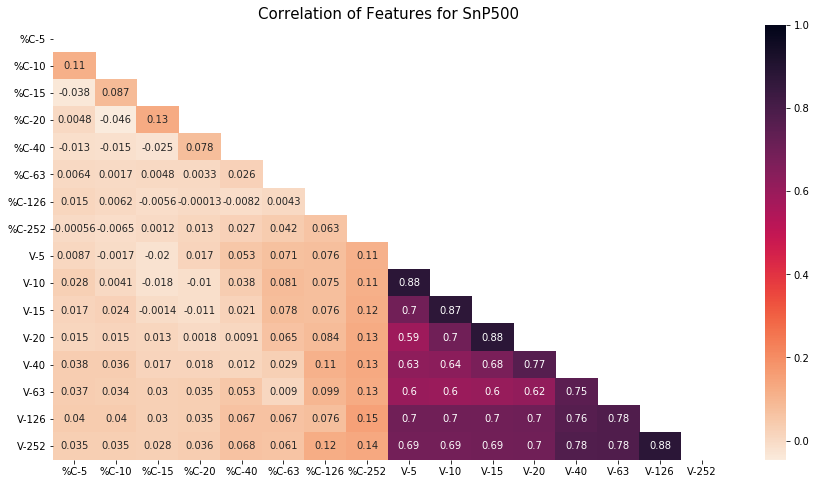

In [19]:
# Look at correlation between the features:
plt.figure(figsize=(15,8))
corr1 = X1.corr()
mask = np.zeros_like(corr1, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
ax = sns.heatmap(corr1, annot=True, cmap='rocket_r',mask=mask)
plt.title('Correlation of Features for SnP500',fontdict={'fontsize':15})

Text(0.5, 1.0, 'Correlation of Features for Dow Jones')

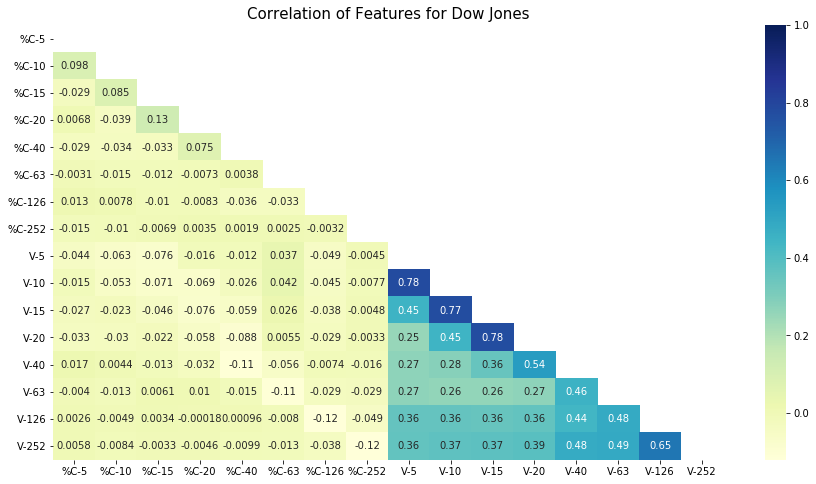

In [20]:
# Look at correlation between the features:
plt.figure(figsize=(15,8))
corr2 = X2.corr()
mask = np.zeros_like(corr2, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
ax = sns.heatmap(corr2, annot=True, cmap='YlGnBu',mask=mask)
plt.title('Correlation of Features for Dow Jones',fontdict={'fontsize':15})

Text(0.5, 1.0, 'Correlation of Features for S&P 500')

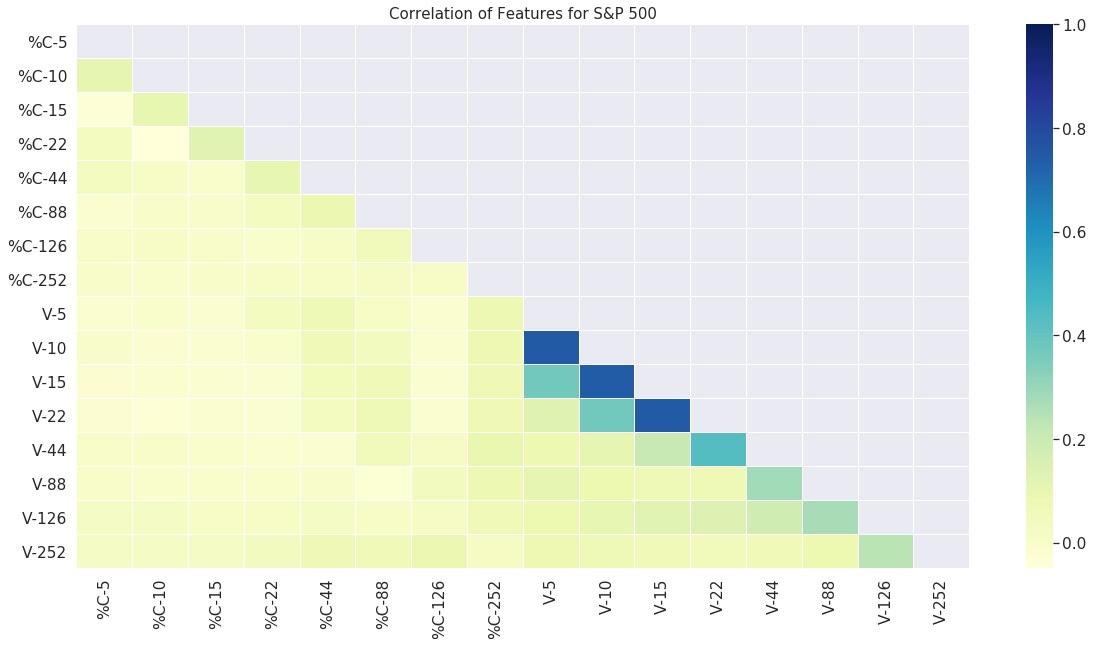

In [34]:
# Look at correlation between the features:
plt.figure(figsize=(20,10))
corr3 = X3[X3.columns[0:16]].corr()
mask = np.zeros_like(corr3, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
ax = sns.heatmap(corr3, annot=False, cmap='YlGnBu',mask=mask,linewidths=.05)
sns.set(font_scale=1.4)
plt.title('Correlation of Features for S&P 500',fontdict={'fontsize':15})

In [30]:
X3.columns[0:8]

Index(['%C-5', '%C-10', '%C-15', '%C-22', '%C-44', '%C-88', '%C-126', '%C-252'], dtype='object')